<a href="https://colab.research.google.com/github/sashwot/DataScience/blob/main/ML_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imported all the necessary python library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#assigned df_ads to the cvs file
df_ads = pd.read_csv('/content/advertising.csv')
df_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:

display(df_ads.shape)
display(df_ads.info())
display(df_ads.describe())


(200, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


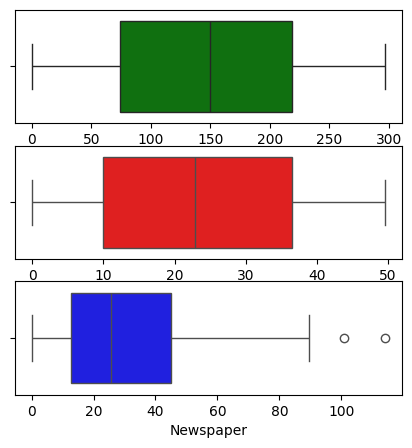

In [ ]:
fig, axis = plt.subplots(3,figsize=(5,5))
plt1 = sns.boxplot(df_ads["TV"], ax = axis[0], orient = 'h', color = 'g')
plt1 = sns.boxplot(df_ads["Radio"], ax = axis[1], orient = 'h', color = 'r')
plt1 = sns.boxplot(df_ads["Newspaper"], ax = axis[2], orient = 'h', color = 'b')

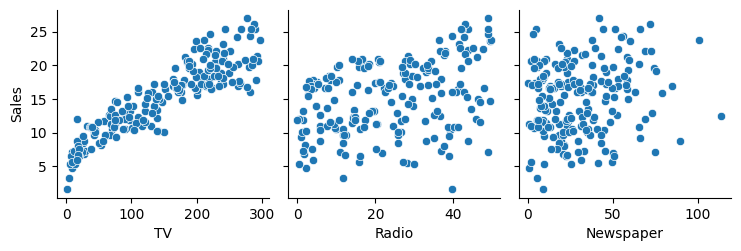

In [ ]:
sns.pairplot(df_ads, x_vars = ["TV", "Radio", "Newspaper"], y_vars="Sales")

<Axes: >

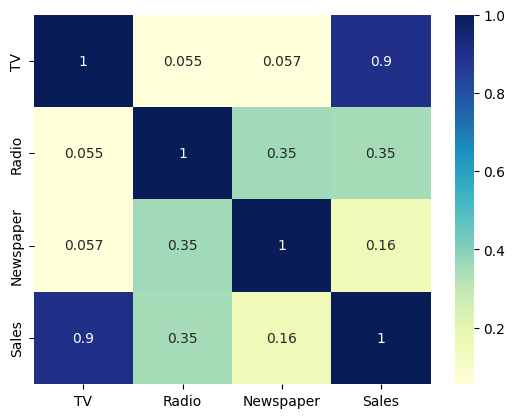

In [ ]:
sns.heatmap(df_ads.corr(), cmap="YlGnBu", annot=True)

In [ ]:
x = df_ads["TV"]
y = df_ads["Sales"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
x_train.head(20)

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
127     80.2
81     239.8
88      88.3
119     19.4
110    225.8
57     136.2
44      25.1
148     38.0
160    172.5
89     109.8
146    240.1
199    232.1
10      66.1
20     218.4
165    234.5
Name: TV, dtype: float64

In [ ]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
linear_reg = globals()["linear_reg"]
linear_reg = sm.OLS(y_train, x_train_sm).fit()

In [ ]:
linear_reg.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.52e-52
Time:                        17:13:15   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

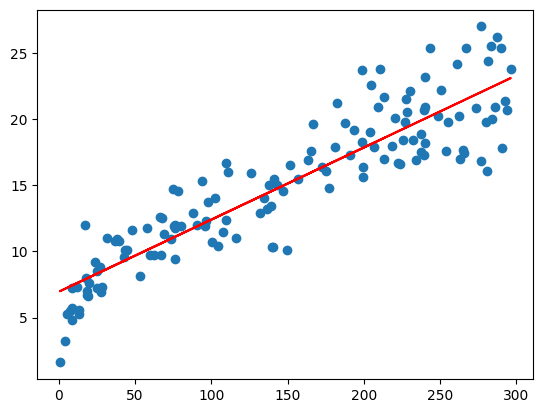

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9487 + 0.0545 * x_train, 'r')

In [ ]:
multi_x = df_ads[["TV", "Radio", "Newspaper"]]
mx_train, mx_test, my_train, my_test = train_test_split(multi_x, y, train_size = 0.3, random_state = 100)

In [ ]:
from sklearn.linear_model import LinearRegression
multiLinReg = LinearRegression()
multiLinReg.fit(mx_train, my_train)

LinearRegression()

In [ ]:
y_predictions = multiLinReg.predict(mx_test)
y_predictions

array([ 8.77036463, 21.12474862, 16.31107749, 20.54338709, 21.86576113,
       17.00895384, 13.95542565, 16.16389282, 20.92398805, 20.97942847,
       12.46585454, 21.31299665,  8.47874986, 17.14124333, 10.74179818,
       10.33624521, 16.13074462, 15.31311625, 17.04777108, 12.86228685,
       18.87367805, 12.72817464, 20.38775422, 17.92952456, 17.1214139 ,
       21.31591524, 20.4909792 , 10.86047397, 18.81753846, 14.58867245,
       12.5611039 ,  9.16486333, 12.69021986, 17.12171273,  8.48164194,
       13.94154965, 10.49382296, 14.86952099, 17.67829505, 17.9258285 ,
       19.55004093, 15.86803239, 16.25169565, 17.80199444, 13.13390906,
       10.84696221, 10.18984219, 21.34414046, 10.32652687,  7.06969028,
       18.36901177, 18.1241104 , 12.35306969, 15.95535261, 19.17711789,
       10.85616649,  6.11288144,  9.29111441, 17.95354914, 12.99114656,
       18.96339947, 17.37631144, 20.30481556, 15.28391836, 12.66818405,
        9.12386806, 19.04074266, 12.56559763,  7.13699835, 18.82

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(my_test, y_predictions)
score_train = r2_score(my_train, multiLinReg.predict(mx_train))
print("R-Squared = " + str(score))
print("Training R-sqaured = " + str(score_train))

R-Squared = 0.870129961805229
Training R-sqaured = 0.9281373053330951
